In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Common Coordinate Framework: Template Volume
The anatomical template of CCF v3 is a shape and background signal intensity average of 1675 specimens from the Allen Mouse Brain Connectivity Atlas. Specimens in the Allen Mouse Brain Connectivity Atlas were imaged using a customized serial two-photon (STP) tomography system, which couples high-speed two-photon microscopy with automated vibratome sectioning. STP tomography yields a series of inherently prealigned images amenable for precise 3-D spatial mapping. A population average was created through an iterative process, averaging many brains over multiple cycles. This iterative process was bootstrapped by 12-parameter affine registration of specimens to the “registration template” created as part of the Allen Mouse Brain Connectivity Atlas data processing pipeline. The “registration template” effectively provides initial orientation and size information to this process. To create a symmetric average, each of the 1675 specimens was flipped across the mid-sagittal plane and the flipped specimens were used as additional input to the averaging process. The total 3350 (= 2 x 1675) hemispheres were registered and averaged to create the first iteration of the CCF v3 anatomical template.

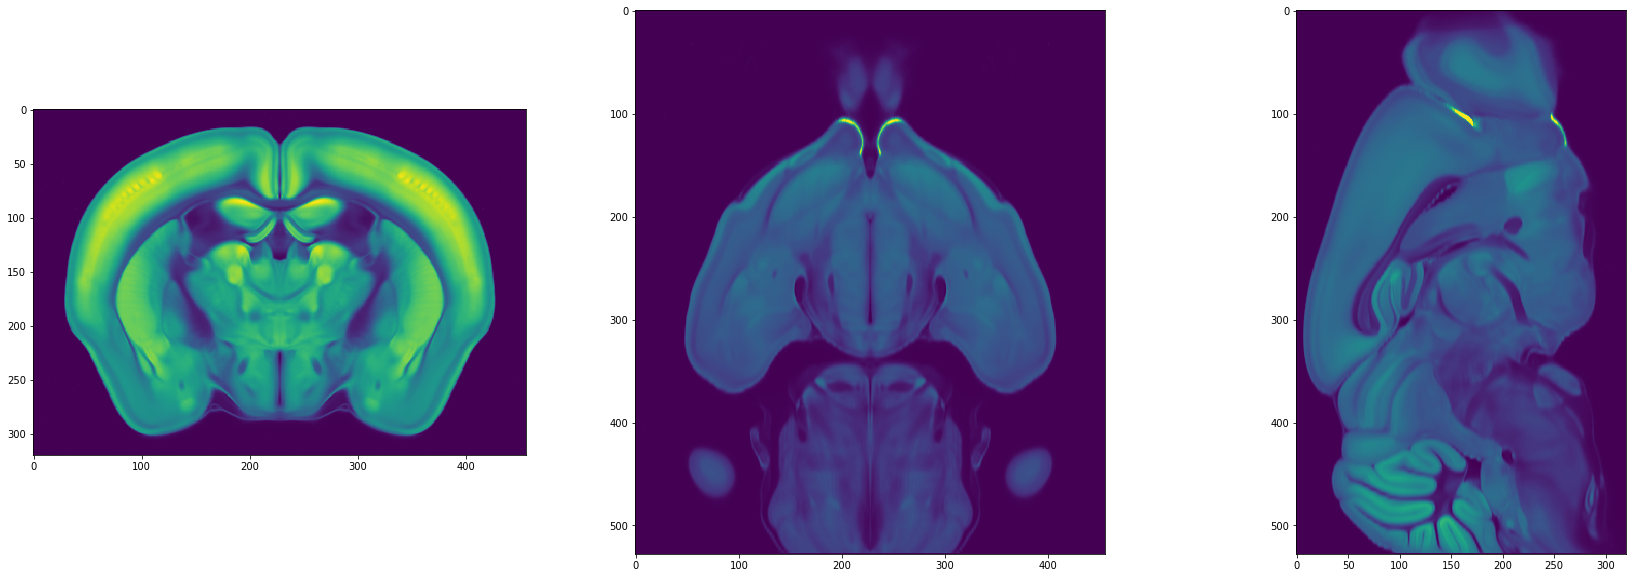

In [2]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')

tv, _ = mcc.get_template_volume()
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(tv[250,:,:])
ax[1].imshow(tv[:,250,:])
ax[2].imshow(tv[:,:,250])
plt.show()

# Acsessing the query engine

The `MouseConnectivityApi` class provides access to an HTTP Client for the Allen Mouse Brain Connectivity Atlas.

In [3]:
from allensdk.api.queries.mouse_connectivity_api import MouseConnectivityApi
mca = MouseConnectivityApi()

# Source Search
To perform a Source Search, a user specifies a set of source structures. The service returns all experiments for which either the primary injection structure or one of its secondary injection structures corresponding to one of the specified source structures or their descendents in the ontology. The search results can also be filtered by a list of transgenic lines.

In [ ]:
qr = mca.experiment_source_search(injection_structures = ['VISp'])
pd.DataFrame(qr).head()

# Target Search
The target search has all the same functional capabilities as Source Search with the added ability to filter your search by limiting the results to experiments where the projection signal passes through a given structure(s).

In [5]:
qr = mca.experiment_source_search(target_domain = ['LGd'])
pd.DataFrame(qr).head()

,gender,id,injection-coordinates,injection-structures,injection-volume,name,num-voxels,product-id,strain,structure-abbrev,structure-color,structure-id,structure-name,sum,transgenic-line
0,M,310035922,"[5370, 6860, 5700]","[{u'abbreviation': u'retina', u'color': u'7F2E...",0.089787,JAM-CreF3xFLP-160596,706,31,,retina,7F2E7E,304325711,retina,0.36467,Jam2-Cre
1,F,306930168,"[5020, 7150, 5700]","[{u'abbreviation': u'retina', u'color': u'7F2E...",0.059093,Thy1-Cre-136,706,31,,retina,7F2E7E,304325711,retina,0.25535,Thy1-Cre
2,M,180296424,"[9570, 1750, 8510]","[{u'abbreviation': u'VISp', u'color': u'08858C...",0.800079,378-1815,706,5,C57BL/6J,VISp,08858C,385,Primary visual area,0.24071,
3,M,309372716,"[8630, 1370, 7810]","[{u'abbreviation': u'VISp', u'color': u'08858C...",0.908778,C57BL/6-155461,706,5,C57BL/6J,VISp,08858C,385,Primary visual area,0.23578,
4,M,306957248,"[4980, 6840, 5700]","[{u'abbreviation': u'retina', u'color': u'7F2E...",0.124325,Thy1-Cre-137,706,31,,retina,7F2E7E,304325711,retina,0.23124,Thy1-Cre


# Injection Coordinate Search
To perform an Injection Coordinate Search, a user specifies a seed location within the 3D reference space. The service returns a rank list of experiments by distance of its injection site to the specified seed location.

In [6]:
qr = mca.experiment_injection_coordinate_search(seed_point=[9570, 1750, 8510], injection_structures = ['MOp'])
pd.DataFrame(qr).head()

,distance,gender,id,injection-coordinates,injection-structures,injection-volume,name,product-id,strain,structure-abbrev,structure-color,structure-id,structure-name,transgenic-line
0,4117.147,F,182616478,"[5900, 1130, 6750]","[{u'abbreviation': u'SSp-ll', u'color': u'1880...",0.176271,Cux2-IRES-Cre-148,5,,MOp,1F9D5A,985,Primary motor area,Cux2-IRES-Cre
1,4324.639,F,157909001,"[5480, 1870, 7110]","[{u'abbreviation': u'SSp-ll', u'color': u'1880...",0.024158,Ntsr1-Cre-3531,5,C57BL/6J,MOp,1F9D5A,985,Primary motor area,Ntsr1-Cre_GN220
2,4337.073,M,156786234,"[5470, 1860, 7100]","[{u'abbreviation': u'SSp-ll', u'color': u'1880...",0.148883,Syt6-Cre-609,5,C57BL/6J,MOp,1F9D5A,985,Primary motor area,Syt6-Cre_KI148
3,4358.509,F,179640955,"[5420, 1290, 7260]","[{u'abbreviation': u'SSp-ll', u'color': u'1880...",0.007110,Scnn1a-Tg3-Cre-4816,5,B6.C3H,MOp,1F9D5A,985,Primary motor area,Scnn1a-Tg3-Cre
4,4431.354,M,166082842,"[5400, 1510, 7030]","[{u'abbreviation': u'SSp-ll', u'color': u'1880...",0.142203,Rbp4-Cre-93,5,,MOp,1F9D5A,985,Primary motor area,Rbp4-Cre_KL100


# Spatial search lines
Download the spatial search lines emanating from the injection site and the coordinates of grid voxels inside of the injection site mask. Output all of this to a json file.

See also:
http://www.brain-map.org/api/examples/examples/lines/index.html

In [9]:
import numpy as np
import json
import urllib, urllib2
import zipfile
import re
import numpy as np

API_SERVER = "http://api.brain-map.org/"
API_DATA_PATH = API_SERVER + "api/v2/data/"
FIBER_TRACT_VOLUME_URL = API_SERVER + "api/v2/well_known_file_download/197646984"
STRUCTURE_GRAPH_ID = 1
REFERENCE_SPACE_ID = 10
DATA_SET_ID = 156394513
DENSITY_RANGE = [0.04, 0.3]
INJECTION_MASK_THRESHOLD = 0.5

GRID_FMT = API_SERVER + "grid_data/download/%d?include=%s"
LINES_FMT = "http://api.brain-map.org/api/v2/data/query.json?criteria=service::mouse_connectivity_target_spatial[seed_point$eq%d,%d,%d][section_data_set$eq%d]"

def DownloadVolume(url, volume):

    fh = urllib.urlretrieve(url)

    zf = zipfile.ZipFile(fh[0])

    header = zf.read(volume + '.mhd')
    raw = zf.read(volume + '.raw')

    arr = np.frombuffer(raw, dtype=np.float32)


    metaLines = header.split('\n')
    metaInfo = dict(line.split(' = ') for line in metaLines if line)

    for k,v in metaInfo.iteritems():
            if re.match("^[\d\s]+$",v):
                nums = v.split(' ')
                if len(nums) > 1:
                    metaInfo[k] = map(float, v.split(' '))
                else:
                    metaInfo[k] = int(nums[0])

    dim_size = map(int, metaInfo['DimSize'])
    arr = arr.reshape(dim_size, order='F')

    return (header, arr, metaInfo)

def DownloadDataSetVolume(dataSetId, volume='density'):
    url = GRID_FMT % (dataSetId, volume)
    return DownloadVolume(url, volume)

def DownloadFiberTractVolume():
    url = API_SERVER + "/api/v2/well_known_file_download/197646984"
    return DownloadVolume(url, 'annotationFiber')

def DownloadTargetLines(target_coordinate, injection_data_set_id):
    url = LINES_FMT % (target_coordinate[0], target_coordinate[1], target_coordinate[2], injection_data_set_id)
    try:
        connection = urllib2.urlopen(url)
        response_text = connection.read()
        response = json.loads(response_text)

        if response['success'] == True:
            return response['msg']
        else:
            return []
    except urllib2.HTTPError as e:
        return []

def DownloadLines(dataSetId, densityRange):
    '''
    Download the spatial search lines for a data set. This is done by searching the density volume for that data set for voxels within a range of density values. A relatively low range is chosen by default to avoid fiber tracts. Voxels in the fiber tract annotation mask are skipped for the same reason.
    '''

    print "downloading density volume"
    densityHeader, densityArr, densityMeta = DownloadDataSetVolume(dataSetId, 'density')
    densitySpacing = np.array(densityMeta['ElementSpacing'])

    print "downloading fiber tract volume"
    ftHeader, ftArr, ftMeta = DownloadFiberTractVolume()
    ftSpacing = np.array(ftMeta['ElementSpacing'])

    ftScale = densitySpacing / ftSpacing.astype(np.float32)
    ftDims = ftArr.shape

    indices = np.argwhere((densityArr >= densityRange[0]) & (densityArr <= densityRange[1]))

    dataSetLines = []

    for index in indices:

        ftIndex = np.array(index * ftScale, dtype=np.int64)
        try:
            ftVal = ftArr[ftIndex[0], ftIndex[1], ftIndex[2]]
        except IndexError as e:
            print index, "outside fiber tract mask"
            continue

        if ftVal == 0:
            coord = index * densitySpacing
            lines = DownloadTargetLines(coord, dataSetId)
            dataSetLines += lines
        else:
            print index, "inside fiber tract mask"

    return dataSetLines

def DownloadInjectionCoordinates(dataSetId, injectionMaskThreshold):
    print "downloading injection mask coordinates"
    header, arr, meta = DownloadDataSetVolume(dataSetId, 'injection')

    spacing = np.array(meta['ElementSpacing'])
    coords = np.argwhere(arr > injectionMaskThreshold) * spacing

    return coords.tolist()

if __name__ == "__main__":

    data = {
        "lines": DownloadLines(DATA_SET_ID, DENSITY_RANGE),
        "injectionCoordinates": DownloadInjectionCoordinates(DATA_SET_ID, INJECTION_MASK_THRESHOLD)
    }

    with open('injection_lines_%s.json' % DATA_SET_ID, 'wb') as f:
        f.write(json.dumps(data))

downloading density volume
downloading fiber tract volume
[38 30 44] inside fiber tract mask
[38 31 42] inside fiber tract mask
[39 30 43] inside fiber tract mask
[39 30 44] inside fiber tract mask
[39 30 45] inside fiber tract mask
[39 31 41] inside fiber tract mask
[39 31 42] inside fiber tract mask
[39 31 43] inside fiber tract mask
[39 31 45] inside fiber tract mask
[39 32 42] inside fiber tract mask
[39 34 38] inside fiber tract mask
[39 35 38] inside fiber tract mask
[39 37 35] inside fiber tract mask
[39 38 36] inside fiber tract mask
[40 29 43] inside fiber tract mask
[40 29 44] inside fiber tract mask
[40 29 45] inside fiber tract mask
[40 29 46] inside fiber tract mask
[40 29 70] inside fiber tract mask
[40 30 41] inside fiber tract mask
[40 30 42] inside fiber tract mask
[40 30 43] inside fiber tract mask
[40 30 44] inside fiber tract mask
[40 30 45] inside fiber tract mask
[40 30 46] inside fiber tract mask
[40 31 40] inside fiber tract mask
[40 31 41] inside fiber tract ma

[43 32 76] inside fiber tract mask
[43 33 34] inside fiber tract mask
[43 33 35] inside fiber tract mask
[43 34 33] inside fiber tract mask
[43 34 34] inside fiber tract mask
[43 35 32] inside fiber tract mask
[43 36 32] inside fiber tract mask
[43 37 31] inside fiber tract mask
[43 38 30] inside fiber tract mask
[43 39 30] inside fiber tract mask
[44 27 44] inside fiber tract mask
[44 27 45] inside fiber tract mask
[44 27 46] inside fiber tract mask
[44 27 68] inside fiber tract mask
[44 27 69] inside fiber tract mask
[44 27 70] inside fiber tract mask
[44 28 41] inside fiber tract mask
[44 28 42] inside fiber tract mask
[44 28 43] inside fiber tract mask
[44 28 44] inside fiber tract mask
[44 28 45] inside fiber tract mask
[44 28 46] inside fiber tract mask
[44 28 47] inside fiber tract mask
[44 28 67] inside fiber tract mask
[44 28 68] inside fiber tract mask
[44 28 69] inside fiber tract mask
[44 28 70] inside fiber tract mask
[44 28 71] inside fiber tract mask
[44 28 72] inside fi

[46 33 32] inside fiber tract mask
[46 33 53] inside fiber tract mask
[46 33 54] inside fiber tract mask
[46 33 55] inside fiber tract mask
[46 33 56] inside fiber tract mask
[46 33 57] inside fiber tract mask
[46 33 58] inside fiber tract mask
[46 33 59] inside fiber tract mask
[46 34 56] inside fiber tract mask
[46 34 57] inside fiber tract mask
[46 34 58] inside fiber tract mask
[46 35 30] inside fiber tract mask
[46 35 84] inside fiber tract mask
[46 36 29] inside fiber tract mask
[46 36 85] inside fiber tract mask
[46 38 28] inside fiber tract mask
[46 41 27] inside fiber tract mask
[46 42 27] inside fiber tract mask
[46 43 27] inside fiber tract mask
[46 44 27] inside fiber tract mask
[46 45 27] inside fiber tract mask
[47 25 44] inside fiber tract mask
[47 25 45] inside fiber tract mask
[47 26 42] inside fiber tract mask
[47 26 43] inside fiber tract mask
[47 26 44] inside fiber tract mask
[47 26 45] inside fiber tract mask
[47 26 46] inside fiber tract mask
[47 26 47] inside fi

[61 68 42] inside fiber tract mask
[62 41 94] inside fiber tract mask
[62 43 77] inside fiber tract mask
[62 44 77] inside fiber tract mask
[62 45 77] inside fiber tract mask
[62 46 75] inside fiber tract mask
[62 46 76] inside fiber tract mask
[62 46 77] inside fiber tract mask
[62 47 75] inside fiber tract mask
[62 47 76] inside fiber tract mask
[62 47 77] inside fiber tract mask
[62 48 74] inside fiber tract mask
[62 48 75] inside fiber tract mask
[62 48 76] inside fiber tract mask
[62 48 77] inside fiber tract mask
[62 49 73] inside fiber tract mask
[62 49 74] inside fiber tract mask
[62 49 75] inside fiber tract mask
[62 49 76] inside fiber tract mask
[62 50 74] inside fiber tract mask
[62 50 75] inside fiber tract mask
[63 45 77] inside fiber tract mask
[63 46 77] inside fiber tract mask
[63 47 76] inside fiber tract mask
[63 47 77] inside fiber tract mask
[63 47 78] inside fiber tract mask
[63 48 75] inside fiber tract mask
[63 48 76] inside fiber tract mask
[63 48 77] inside fi

[75 53 78] inside fiber tract mask
[75 54 77] inside fiber tract mask
[75 54 78] inside fiber tract mask
[75 55 76] inside fiber tract mask
[75 55 77] inside fiber tract mask
[75 55 78] inside fiber tract mask
[75 56 75] inside fiber tract mask
[75 56 76] inside fiber tract mask
[75 56 77] inside fiber tract mask
[75 57 73] inside fiber tract mask
[75 57 74] inside fiber tract mask
[75 57 75] inside fiber tract mask
[75 57 76] inside fiber tract mask
[75 57 77] inside fiber tract mask
[75 58 72] inside fiber tract mask
[75 58 73] inside fiber tract mask
[75 58 74] inside fiber tract mask
[75 58 75] inside fiber tract mask
[75 58 76] inside fiber tract mask
[75 59 72] inside fiber tract mask
[75 59 73] inside fiber tract mask
[75 59 74] inside fiber tract mask
[75 59 75] inside fiber tract mask
[75 60 72] inside fiber tract mask
[75 60 73] inside fiber tract mask
[76 54 78] inside fiber tract mask
[76 55 76] inside fiber tract mask
[76 55 77] inside fiber tract mask
[76 55 78] inside fi

[87 63 60] inside fiber tract mask
[87 63 61] inside fiber tract mask
[87 63 62] inside fiber tract mask
[87 63 63] inside fiber tract mask
[87 64 62] inside fiber tract mask
[87 64 63] inside fiber tract mask
[88 25 74] inside fiber tract mask
[88 26 75] inside fiber tract mask
[88 54 66] inside fiber tract mask
[88 55 64] inside fiber tract mask
[88 55 65] inside fiber tract mask
[88 55 66] inside fiber tract mask
[88 55 67] inside fiber tract mask
[88 56 63] inside fiber tract mask
[88 56 64] inside fiber tract mask
[88 56 65] inside fiber tract mask
[88 56 66] inside fiber tract mask
[88 56 67] inside fiber tract mask
[88 56 68] inside fiber tract mask
[88 57 63] inside fiber tract mask
[88 57 64] inside fiber tract mask
[88 57 65] inside fiber tract mask
[88 57 66] inside fiber tract mask
[88 57 67] inside fiber tract mask
[88 57 68] inside fiber tract mask
[88 58 62] inside fiber tract mask
[88 58 63] inside fiber tract mask
[88 58 64] inside fiber tract mask
[88 58 65] inside fi

[101  72  60] inside fiber tract mask
[102  68  59] inside fiber tract mask
[102  68  60] inside fiber tract mask
[102  69  58] inside fiber tract mask
[102  69  59] inside fiber tract mask
[102  70  58] inside fiber tract mask
[102  70  59] inside fiber tract mask
[102  71  58] inside fiber tract mask
[102  71  59] inside fiber tract mask
[102  71  60] inside fiber tract mask
[102  72  59] inside fiber tract mask
[102  72  60] inside fiber tract mask
[103  69  58] inside fiber tract mask
[103  69  59] inside fiber tract mask
[103  69  60] inside fiber tract mask
[103  70  58] inside fiber tract mask
[103  70  59] inside fiber tract mask
[103  70  60] inside fiber tract mask
[103  70  61] inside fiber tract mask
[103  71  57] inside fiber tract mask
[103  71  58] inside fiber tract mask
[103  71  59] inside fiber tract mask
[103  71  60] inside fiber tract mask
[103  71  61] inside fiber tract mask
[103  71  62] inside fiber tract mask
[103  72  60] inside fiber tract mask
[103  72  61